In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
data = pd.read_csv('assign6.csv')

In [3]:
prices = data['price']

In [4]:
alpha = data['alpha']

In [5]:
def calculate_pnl(L, B, prices, alpha):
    position = 0
    pnl = 0
    portfolio_value = []
    entry_price = 0

    for i in range(len(alpha)):
        if position == 0:
            if alpha[i] > B:
                position = 1
                entry_price = prices[i]
            elif alpha[i] < -B:
                position = -1
                entry_price = prices[i]
        elif position == 1:
            if alpha[i] < L:
                pnl += prices[i] - entry_price
                position = 0
        elif position == -1:
            if alpha[i] > -L:
                pnl += entry_price - prices[i]
                position = 0

        portfolio_value.append(pnl + (prices[i] - entry_price if position == 1 else entry_price - prices[i] if position == -1 else 0))
    return pnl, portfolio_value

In [6]:
def optimize_thresholds(prices, alpha, target_pnl=35000):
    opt_L, opt_B = 0, 0
    opt_pnl = -np.inf
    opt_pnl_list = []
    L_values = np.linspace(0.01, 1, 50)
    B_values = np.linspace(0.01, 1, 50)

    for L, B in product(L_values, B_values):
        if L >= B:
            continue
        pnl, pnl_list = calculate_pnl(L, B, prices, alpha)
        if pnl > opt_pnl:
            opt_pnl = pnl
            opt_L, opt_B = L, B
            opt_pnl_list = pnl_list

        if opt_pnl >= target_pnl:
            break
    return opt_L, opt_B, opt_pnl, opt_pnl_list

In [7]:
(opt_L, opt_B, opt_pnl, opt_pnl_list) = optimize_thresholds(prices, alpha)

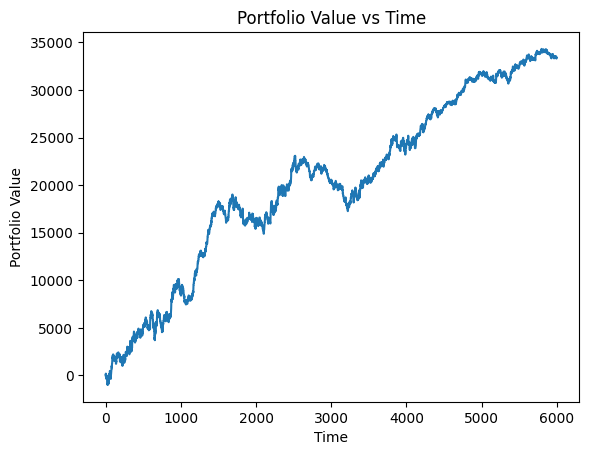

In [8]:
plt.plot(opt_pnl_list)
plt.title('Portfolio Value vs Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.show()

In [9]:
def calculate_max_drawdown(pnl_list):
    max_drawdown = 0
    peak = pnl_list[0]
    for value in pnl_list:
        if value > peak:
            peak = value
        drawdown = peak - value
        if drawdown > max_drawdown:
            max_drawdown = drawdown
    return max_drawdown

In [10]:
def calculate_hit_ratio(pnl_list):
    wins = sum(p > 0 for p in pnl_list)
    return wins / len(pnl_list) if len(pnl_list) > 0 else 0

In [11]:
hit_ratio = calculate_hit_ratio(opt_pnl_list)
max_drawdown = calculate_max_drawdown(opt_pnl_list)

In [12]:
print(f"Best L: {opt_L}, Best B: {opt_B}, Best PnL: {opt_pnl}")
print(f"Max Drawdown: {max_drawdown}")
print(f"Hit Ratio: {hit_ratio}")

Best L: 0.05040816326530612, Best B: 0.1716326530612245, Best PnL: 33364.03536505256
Max Drawdown: 5813.380623658766
Hit Ratio: 0.9913333333333333
